In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Data Collection

In [2]:
data=pd.read_csv('Datasets/Default.csv')

In [3]:
data.head()

,default,student,balance,income
0,No,No,729.526495,44361.62507
1,No,Yes,817.180407,12106.13470
2,No,No,1073.549164,31767.13895
3,No,No,529.250605,35704.49394
4,No,No,785.655883,38463.49588


## EDA

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   default  10000 non-null  object 
 1   student  10000 non-null  object 
 2   balance  10000 non-null  float64
 3   income   10000 non-null  float64
dtypes: float64(2), object(2)
memory usage: 312.6+ KB


In [5]:
data['default'].unique()

array(['No', 'Yes'], dtype=object)

In [6]:
data['student'].unique()

array(['No', 'Yes'], dtype=object)

{'whiskers': [<matplotlib.lines.Line2D at 0x1f805d4dbd0>,
 'caps': [<matplotlib.lines.Line2D at 0x1f805d4de50>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f805c71a90>],
 'medians': [<matplotlib.lines.Line2D at 0x1f805d4e0d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f805d4e210>],
 'means': []}

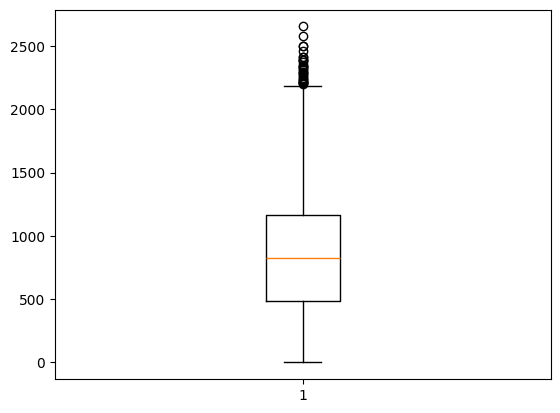

In [7]:
plt.boxplot(data['balance'])

In [8]:
q3=data['balance'].quantile(0.75)
q1=data['balance'].quantile(0.25)
iqr=q3-q1
upper=q3+1.5*iqr
upper

np.float64(2193.1743093)

In [9]:
data[data['balance']>upper].count()

default    31
student    31
balance    31
income     31
dtype: int64

In [10]:
data.describe()

,balance,income
count,10000.000000,10000.000000
mean,835.374886,33516.981876
std,483.714985,13336.639563
min,0.000000,771.967729
25%,481.731105,21340.462905
50%,823.636973,34552.644800
75%,1166.308387,43807.729275
max,2654.322576,73554.233500


{'whiskers': [<matplotlib.lines.Line2D at 0x1f805f46e90>,
 'caps': [<matplotlib.lines.Line2D at 0x1f805f47110>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f805f46d50>],
 'medians': [<matplotlib.lines.Line2D at 0x1f805f47390>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f805f474d0>],
 'means': []}

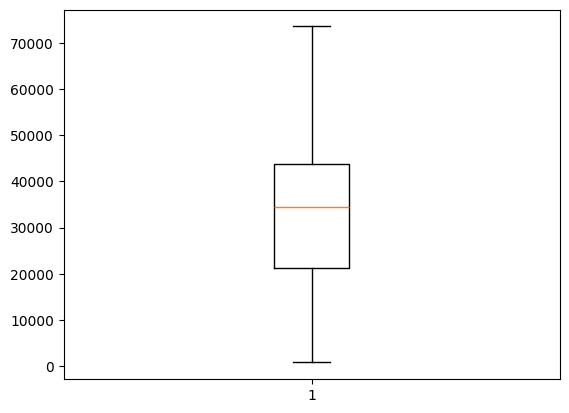

In [11]:
plt.boxplot(data['income'])

In [12]:
data=data.drop(data[data['balance']>upper].index)

In [13]:
data.shape

(9969, 4)

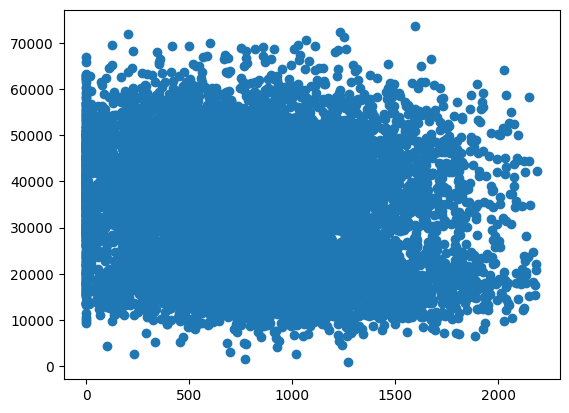

In [14]:
plt.scatter(data['balance'],data['income'])

In [15]:
data.head()

,default,student,balance,income
0,No,No,729.526495,44361.62507
1,No,Yes,817.180407,12106.13470
2,No,No,1073.549164,31767.13895
3,No,No,529.250605,35704.49394
4,No,No,785.655883,38463.49588


In [16]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['student']=le.fit_transform(data['student'])
data['default']=le.fit_transform(data['default'])

<Axes: >

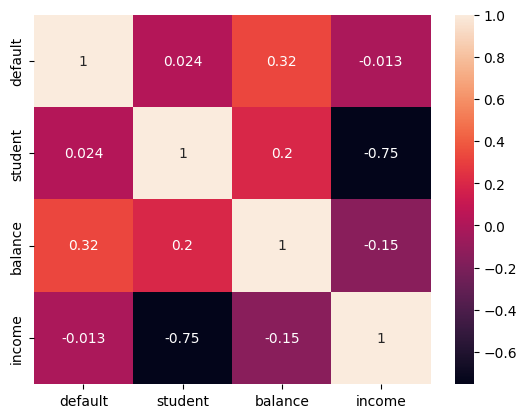

In [17]:
sns.heatmap(data.corr(),annot=True)

## Feature Engineering

In [18]:
# X=data.drop('default',axis=1).values
# y=data['default'].values
X=data.drop('default',axis=1)
y=data['default']

In [19]:
X.head()

,student,balance,income
0,0,729.526495,44361.62507
1,1,817.180407,12106.13470
2,0,1073.549164,31767.13895
3,0,529.250605,35704.49394
4,0,785.655883,38463.49588


In [20]:
y.shape

(9969,)

In [21]:
X.shape

(9969, 3)

## Splitting data for training and testing

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

## Build Model

In [23]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

## Train model

In [24]:
knn.fit(X_train,y_train)

,"n_neighbors n_neighbors: int, default=5Number of neighbors to use by default for :meth:`kneighbors` queries.",5
,"weights weights: {'uniform', 'distance'}, callable or None, default='uniform'Weight function used in prediction. Possible values:- 'uniform' : uniform weights. All points in each neighborhood are weighted equally.- 'distance' : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.- [callable] : a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.Refer to the example entitled:ref:`sphx_glr_auto_examples_neighbors_plot_classification.py`showing the impact of the `weights` parameter on the decisionboundary.",'uniform'
,"algorithm algorithm: {'auto', 'ball_tree', 'kd_tree', 'brute'}, default='auto'Algorithm used to compute the nearest neighbors:- 'ball_tree' will use :class:`BallTree`- 'kd_tree' will use :class:`KDTree`- 'brute' will use a brute-force search.- 'auto' will attempt to decide the most appropriate algorithm based on the values passed to :meth:`fit` method.Note: fitting on sparse input will override the setting ofthis parameter, using brute force.",'auto'
,"leaf_size leaf_size: int, default=30Leaf size passed to BallTree or KDTree. This can affect thespeed of the construction and query, as well as the memoryrequired to store the tree. The optimal value depends on thenature of the problem.",30
,"p p: float, default=2Power parameter for the Minkowski metric. When p = 1, this is equivalentto using manhattan_distance (l1), and euclidean_distance (l2) for p = 2.For arbitrary p, minkowski_distance (l_p) is used. This parameter is expectedto be positive.",2
,"metric metric: str or callable, default='minkowski'Metric to use for distance computation. Default is ""minkowski"", whichresults in the standard Euclidean distance when p = 2. See thedocumentation of `scipy.spatial.distance`_ andthe metrics listed in:class:`~sklearn.metrics.pairwise.distance_metrics` for valid metricvalues.If metric is ""precomputed"", X is assumed to be a distance matrix andmust be square during fit. X may be a :term:`sparse graph`, in whichcase only ""nonzero"" elements may be considered neighbors.If metric is a callable function, it takes two arrays representing 1Dvectors as inputs and must return one value indicating the distancebetween those vectors. This works for Scipy's metrics, but is lessefficient than passing the metric name as a string.",'minkowski'
,"metric_params metric_params: dict, default=NoneAdditional keyword arguments for the metric function.",None
,"n_jobs n_jobs: int, default=NoneThe number of parallel jobs to run for neighbors search.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.Doesn't affect :meth:`fit` method.",None


## Evaluate Model: Testing model

In [25]:
test_pred=knn.predict(X_test)
test_pred.size

2991

## Check Accuracy

In [26]:
from sklearn.metrics import accuracy_score

In [27]:
accuracy_score(y_test,test_pred)

0.9715814108993648

In [28]:
y_test.value_counts()

default
0    2913
1      78
Name: count, dtype: int64

In [29]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,test_pred)

array([[2895,   18],
       [  67,   11]])

In [30]:
test_acc=[]
train_acc=[]
k=[]
for i in range(3,16,2):
    k.append(i)
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    train_pred=knn.predict(X_train)
    test_pred=knn.predict(X_test)
    test_acc.append(accuracy_score(y_test,test_pred))
    train_acc.append(accuracy_score(y_train,train_pred))

In [31]:
print(test_acc)

[0.9672350384486794, 0.9715814108993648, 0.9739217652958877, 0.9749247743229689, 0.974256101638248, 0.9735874289535272, 0.9735874289535272]


In [32]:
print(train_acc)

[0.9770707939237604, 0.972341645170536, 0.970908569790771, 0.9697621094869591, 0.9693321868730295, 0.9683290341071941, 0.967755803955288]


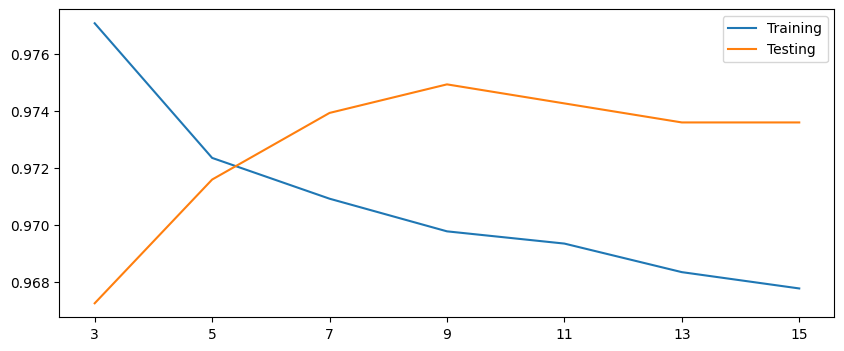

In [33]:
plt.figure(figsize=(10,4))
plt.plot(k,train_acc)
plt.plot(k,test_acc)
plt.xticks(k)
plt.legend(['Training','Testing'])

In [34]:
from sklearn.metrics import classification_report
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      2913
           1       0.33      0.01      0.02        78

    accuracy                           0.97      2991
   macro avg       0.65      0.51      0.51      2991
weighted avg       0.96      0.97      0.96      2991

